- 파이썬으로 데이터 주무르기 by 민형기 도서의 예제

1. 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교
2. 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
3. 고령자 대비 cctv 비율
4. 외국인 대비 cctv 비율

- 사용 데이터 
- .서울시 지자체별 cctv 현황 data/01. CCTV_in_Seoul.csv
- .서울시 지자체별 인구 현황 data/01.population_in_Seoul.xls

In [1]:
# 필요모듈 import
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 1. cctv data 읽어오기
# 한글이 포함되어 있음
cctv_seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
# 컬럼명 추출
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
# 컬럼명 변경 : df.rename(columns={바꿀위치 : 새로운값})
# 원본 반영 안됨 : inplace=True
# 기관명 -> 구별 : 전달력을 높이기 위해 컬럼명 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'},inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [ ]:
# Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.
# %pip install xlrd

In [9]:
# 서울시 인구현황 가져오기 - 엑셀파일 읽어오기
# pd.read_excel('파일명')
pop_seoul = pd.read_excel('./data/01.population_in_Seoul.xls')
pop_seoul.head()
pop_seoul.tail()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
24,2017.1/4,서초구,173856,450310,216264,234046,445994,214036,231958,4316,2228,2088,2.57,51733
25,2017.1/4,강남구,234107,570500,273301,297199,565550,270726,294824,4950,2575,2375,2.42,63167
26,2017.1/4,송파구,259883,667483,325040,342443,660584,321676,338908,6899,3364,3535,2.54,72506
27,2017.1/4,강동구,179676,453233,225427,227806,449019,223488,225531,4214,1939,2275,2.5,54622
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#필요 data 만 가져오기, 자치구, 전체인구수,한국인,외국인,고령자(B,D,G,J,N)
# usecols='선택열'
#2행을 skip하고 3행을 header 처리
pop_seoul = pd.read_excel('./data/01.population_in_Seoul.xls',
                          header=2,
                          usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [17]:
#컬럼명 변경
#0: 구별 => cctv df의 구별 컬럼과 동일한 컬럼명을 사용(두 df를 하나로 합칠때 키 컬럼으로 사용)
#1:인구수
#2:한국인
#3:외국인
#4:고령자
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자'},inplace=True)
pop_seoul.head()
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [16]:
# 각 데이터 파악하기
cctv_seoul.info()
pop_seoul.info() #27행임, 서울시 구는 25개구인데 27행이므로 확인해야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구별         25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [18]:
pop_seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [19]:
# 서울시 인구데이터 pop_Seoul의 첫행이 합계임(불필요한 data)
# 행삭제 : drop() - 삭제후 재실행을 대비해서 주석처리 해야 함
# pop_seoul.drop([0], inplace=True)

In [20]:
pop_seoul.head(1)
pop_seoul.info()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [21]:
# 26개의 행이 있는걸로 확인됨
len(pop_seoul)

26

In [22]:
# 구별 데이터 중복되지 않았는지 확인
len(pop_seoul['구별'].unique())

26

In [23]:
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


- 구별 data에 nan값이 존재 : 제거
- 몇번행에 nan값이 있는지 확인 후 해당행을 제거
- isnull()함수 이용 조건 인덱싱

In [25]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [26]:
# 해당행 제거 - 제거 후 재실행 대비 주석처리
# pop_seoul.drop([26], inplace=True)

In [27]:
pop_seoul.info()
pop_seoul.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


#### 가공필드 생성

In [28]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [30]:
# cctv 데이터
# 설치대수가 적은 5개 구를 확인
# 정렬기능 이용
cctv_seoul.sort_values(by='소계').head()
# 도봉구의 설치대수가 가장 적다

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [31]:
# 설치대수가 많은 5개 구를 확인
cctv_seoul.sort_values(by='소계', ascending=False).head()
# 강남구의 설치대수가 가장 많다

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [35]:
# Data상 최근 3개년동안 cctv가 얼마나 증가했는지 확인
# 각 연도별 cctv 대수는 해당년도에 설치한 대수를 의미함
# 최근 증가율 = (2014년+2015년+2016년)/2013년도이전 * 100
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + 
                            cctv_seoul['2015년'] +
                            cctv_seoul['2016년'])/cctv_seoul['2013년도 이전'] * 100

In [36]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [37]:
# Data 상 최근 3개년동안  cctv 증가율이 높은 3개 구를 확인
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911


#### 인구데이터

In [38]:
# 어느구의 인구가 가장 많은가?
pop_seoul.head()
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


,구별,인구수,한국인,외국인,고령자
24,송파구,667483.0,660584.0,6899.0,72506.0
16,강서구,603772.0,597248.0,6524.0,72548.0
23,강남구,570500.0,565550.0,4950.0,63167.0
11,노원구,569384.0,565565.0,3819.0,71941.0
21,관악구,525515.0,507203.0,18312.0,68082.0


In [39]:
# 고령자수가 많은 구
pop_seoul.sort_values(by='고령자', ascending=False).head()
# 외국인이 많은 구
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자
16,강서구,603772.0,597248.0,6524.0,72548.0
24,송파구,667483.0,660584.0,6899.0,72506.0
12,은평구,494388.0,489943.0,4445.0,72334.0
11,노원구,569384.0,565565.0,3819.0,71941.0
21,관악구,525515.0,507203.0,18312.0,68082.0


,구별,인구수,한국인,외국인,고령자
19,영등포구,402985.0,368072.0,34913.0,52413.0
17,구로구,447874.0,416487.0,31387.0,56833.0
18,금천구,255082.0,236353.0,18729.0,32970.0
21,관악구,525515.0,507203.0,18312.0,68082.0
6,동대문구,369496.0,354079.0,15417.0,54173.0


In [40]:
# 인구데이터 가공필드 생성
# 전체 인구수 대비 외국인 비율 계산 후 컬럼 생성
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul.head(2)

,구별,인구수,한국인,외국인,고령자,외국인비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690


In [41]:
# 전체 인구수 대비 고령자 비율 계산 후 컬럼 생성
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수'] * 100
pop_seoul.head(2)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


In [42]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [43]:
# 인구 대비 cctv 대수의 적정성을 확인해야 하므로 
# 두 DF를 병합 - 양쪽 df에 '구별'컬럼(동일한 의미)
# merge(data1, data2, on=기준컬럼)
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [44]:
# 불필요한 열 삭제
# cctv데이터의 2013-2016필드 삭제
# del data_result['2013년도 이전']
# del data_result['2014년']
# del data_result['2015년']
# del data_result['2016년']

In [46]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [47]:
# 시각화등에 편리하게 사용하기 위해 기준열인 '구별' 컬럼을 행인덱스로 처리
# df.set_index(컬럼명,[inplace=True])
data_result.set_index('구별', inplace=True)

In [48]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [49]:
# 다수의 데이터 중에서 상관관계가 가장 큰 데이터를 비교
# 인구와 관련된 각 필드와 cctv 소계와의 상관계수를 파악해서 그래프로 표현

# 상관계수 : 두 변수의 관련성을 확인하는 방법
# 절대값이 클수록 두 데이터는 관계가 있다고 봄

# 절대값 기준
# 0.1이하면 무시
# 0.3이하면 약한 상관 관계
# 0.7을 기준으로 강한 상관관계가 있다 봄

# 상관관계 파악할 컬럼
# 절대적인 cctv 대수 : 인구수/고령자비율/외국인비율

# np.corrcoef(데이터값 1, 데이터값 2)
np.corrcoef(data_result['소계'], data_result['인구수'])
# 상관계수 : 0.2432198 - 약한 양의 상관

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

In [50]:
np.corrcoef(data_result['소계'], data_result['고령자비율'])
# 상관계수 : -0.25866272 - 약한 음의 상관

array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

In [51]:
np.corrcoef(data_result['소계'], data_result['외국인비율'])
# 상관계수 : -0.05230165 - 절대값이 0.1이하이므로 두 변수는 상관성이 없다

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

### cctv vs 인구 현황 시각화

In [52]:
import matplotlib.pyplot as plt # 그래프 패키지
%matplotlib inline 
# 노트북 내 out 창에서 그래프 출력

In [53]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [54]:
# 사용 data
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [57]:
# data_result['소계'] # 시리즈 반환
# data_result[['소계']] # df 반환

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:ylabel='구별'>

<Figure size 1000x1000 with 0 Axes>

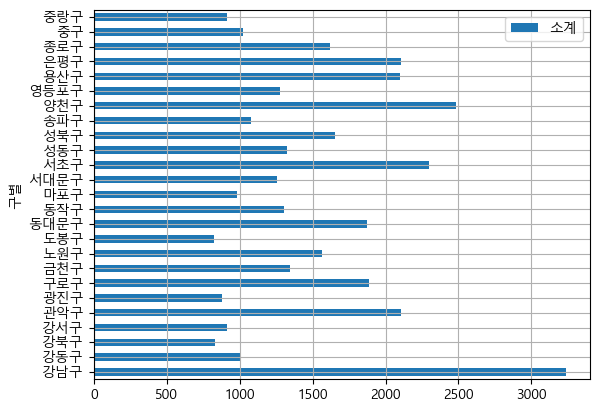

In [58]:
# 구별로 cctv 대수가 얼마나 차이가 나는지
plt.figure(figsize=(10,10))
data_result[['소계']].plot(kind='barh', grid=True)
plt.show()

<AxesSubplot:ylabel='구별'>

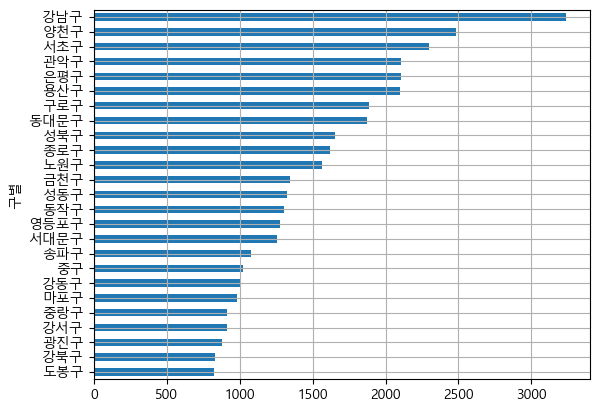

In [61]:
# 소계를 기준으로 정렬해서 그래프를 그림
sort_cctv = data_result['소계'].sort_values()
# sort_cctv # 시리즈
sort_cctv.plot(kind='barh',grid=True)
plt.show()

1. cctv 는 강남구가 가장 많이 설치되어 있음

2. 인구수, 외국인비율, 고령자비율과 cctv의 상관관계를 확인했을때
    - 인구수 vs cctv
    - 고령자 비율 vs cctv 가 약한 상관관계를 보임
    
3. 인구수 vs cctv 의 그래프 그리기

4. 각 구별로 인구수 대비 cctv 설치비율을 확인해서
    - 인구수와 설치비율 데이터 관계 확인
- 가공필드 작성

In [62]:
# 인구수 대비 cctv 설치비율 계산
data_result['cctv비율']=data_result['소계']/data_result['인구수']*100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


<AxesSubplot:ylabel='구별'>

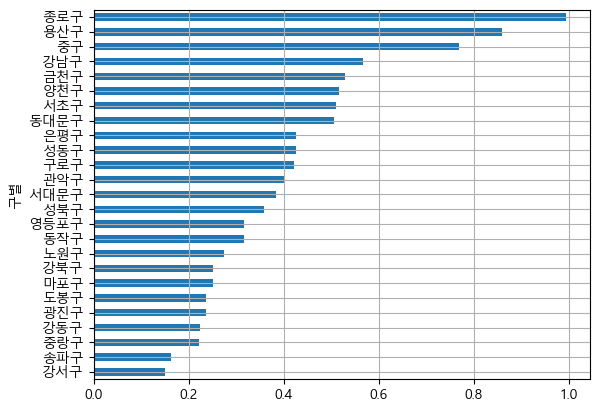

In [64]:
# cctv 비율을 확인
data_result['cctv비율'].sort_values().plot(kind='barh',grid=True)

### 인구대비 cctv 비율은 용산구와 종로구/중구가 월등히 높다
- 주거지역이 적고 유동인구가 많은 대표 지역

- 분산그래프(scatter()) - 인구수 vs cctv

Text(0.5, 0, '인구수')

Text(0, 0.5, '소계')

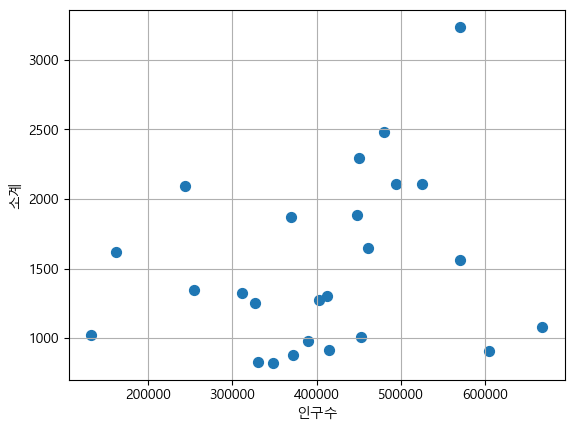

In [65]:
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

In [66]:
# 다음 분석을 위해 data 저장 - csv 파일로 저장
data_result.to_csv('./data/data_result.csv', encoding='utf-8')

In [68]:
cctv_seoul.head()
pop_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
